In [1]:
!git clone https://github.com/zae-bayern/elpv-dataset.git

Cloning into 'elpv-dataset'...
remote: Enumerating objects: 2686, done.
remote: Total 2686 (delta 0), reused 0 (delta 0), pack-reused 2686
Receiving objects: 100% (2686/2686), 90.79 MiB | 57.14 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [2]:

from PIL import Image
import numpy as np
import os


def load_dataset(fname=None):
    if fname is None:
        # Assume we are in the utils folder and get the absolute path to the
        # parent directory.
        fname = os.path.abspath(os.path.join(os.path.dirname(__file__),
                                             os.path.pardir))
        fname = os.path.join(fname, 'labels.csv')

    data = np.genfromtxt(fname, dtype=['|S19', '<f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    image_fnames = np.char.decode(data['path'])
    probs = data['probability']
    types = np.char.decode(data['type'])

    def load_cell_image(fname):
        with Image.open(fname) as image:
            return np.asarray(image)

    dir = os.path.dirname(fname)

    images = np.array([load_cell_image(os.path.join(dir, fn))
                       for fn in image_fnames])

    return images, probs, types




In [3]:
!pwd

/content


In [4]:
images, proba, types = load_dataset('/content/elpv-dataset/labels.csv')

In [5]:
images

array([[[14, 14, 14, ...,  9,  9,  9],
        [15, 15, 15, ..., 10,  9,  9],
        [15, 15, 16, ..., 10, 10, 10],
        ...,
        [29, 29, 29, ..., 19, 18,  4],
        [29, 29, 29, ..., 18, 18,  4],
        [29, 29, 29, ..., 18, 18,  4]],

       [[29, 29, 29, ..., 17, 16,  3],
        [29, 29, 29, ..., 17, 16,  3],
        [29, 29, 29, ..., 16, 15,  3],
        ...,
        [21, 22, 21, ..., 12, 12, 11],
        [20, 20, 20, ..., 12, 12, 11],
        [19, 19, 18, ..., 12, 12, 10]],

       [[29, 29, 30, ..., 19, 18,  4],
        [29, 30, 30, ..., 19, 18,  4],
        [30, 30, 31, ..., 18, 18,  3],
        ...,
        [35, 35, 35, ..., 21, 12,  0],
        [35, 35, 35, ..., 21, 12,  0],
        [35, 35, 35, ..., 21, 12,  0]],

       ...,

       [[66, 65, 62, ..., 62, 62, 62],
        [64, 62, 61, ..., 60, 60, 61],
        [63, 61, 59, ..., 61, 60, 60],
        ...,
        [45, 50, 55, ..., 57, 51, 47],
        [45, 47, 48, ..., 52, 49, 46],
        [43, 43, 44, ..., 48, 46

In [6]:
# We have 2624 samples of 300X300 8-bit grey scale images

In [7]:
print(images[0].shape , " " , proba.shape , " " , types.shape)

(300, 300)   (2624,)   (2624,)


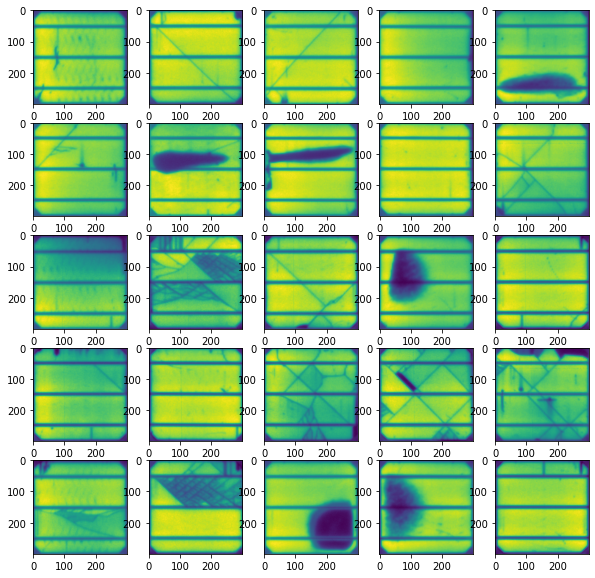

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(images[i])

In [9]:
prob_new = proba

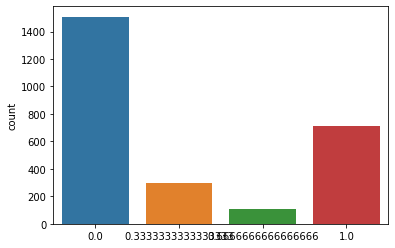

In [10]:
import seaborn as sns
sns.countplot(x = proba)


In [11]:
for i in range(0, prob_new.size):
  prob_new[i] = (0.5 <= prob_new[i])

Text(0.5, 0, 'Defect probability')

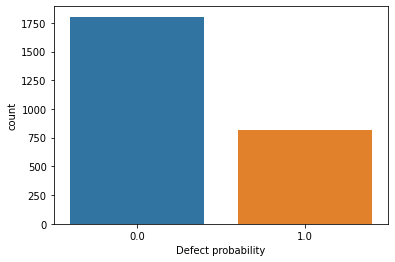

In [12]:
import seaborn as sns
sns.countplot(x = prob_new)
plt.xlabel('Defect probability')


In [13]:
#for i in range(0, types.size):
#  if types[i] == 'mono':
#    types[i] = 0
#  else:
#    types[i] = 1

In [14]:
types

array(['mono', 'mono', 'mono', ..., 'poly', 'poly', 'poly'], dtype='<U4')

In [15]:
training_data = []
for i in range(0, types.size):
  training_data.append([images[i], prob_new[i]])

In [16]:
training_data[3]

[array([[35, 35, 35, ..., 20, 11,  0],
        [35, 35, 36, ..., 20, 11,  0],
        [36, 36, 36, ..., 20, 11,  0],
        ...,
        [41, 41, 40, ..., 25,  3,  0],
        [41, 40, 40, ..., 24,  3,  0],
        [40, 40, 40, ..., 24,  3,  0]], dtype=uint8), 0.0]

In [17]:
len(training_data)

2624

In [18]:
import random

random.shuffle(training_data)

In [19]:
for sample in training_data[:20]:
  print(sample[1])

0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0


In [20]:
X = []
y = []

In [21]:
for features, labels in training_data:
  X.append(features)
  y.append(labels)

In [22]:
X[0:2]

[array([[45, 73, 73, ..., 81, 79, 79],
        [45, 72, 73, ..., 79, 79, 80],
        [45, 72, 73, ..., 80, 80, 80],
        ...,
        [67, 67, 66, ..., 73, 74, 74],
        [67, 68, 66, ..., 72, 75, 73],
        [69, 71, 68, ..., 72, 73, 72]], dtype=uint8),
 array([[50, 50, 50, ..., 46, 47, 48],
        [51, 51, 50, ..., 46, 47, 47],
        [52, 51, 51, ..., 47, 47, 47],
        ...,
        [50, 48, 50, ..., 47, 46, 47],
        [49, 48, 50, ..., 47, 47, 47],
        [48, 49, 48, ..., 46, 46, 47]], dtype=uint8)]

In [23]:
y[:10]

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]

In [39]:
X = np.array(X).reshape(-1, 300, 300, 1)
y = np.array(y)

In [40]:
y[:2]

array([0., 0.])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [42]:
print("Train data shape", X_train.shape, y_train.shape, "--", "Test data shape", X_test.shape, y_test.shape)

Train data shape (1836, 300, 300, 1) (1836,) -- Test data shape (788, 300, 300, 1) (788,)


In [43]:
!pip install conv

  Created wheel for conv: filename=conv-0.2-cp37-none-any.whl size=5259 sha256=d641e981751d3232d4ff3feb0a70ad3929127f7dc832c0c9c0ed2e73cc608a40
  Stored in directory: /root/.cache/pip/wheels/bf/6e/eb/a2640d44699958e7f5f0ec1e54913cd40903bdda913b32b007
Successfully built conv


CNN Model

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [45]:
X_train = X_train/255.0
X_test = X_test/255.0

In [49]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
58/58 [==============================] - 9s 151ms/step - loss: 4.1329 - accuracy: 0.6515 - val_loss: 0.6135 - val_accuracy: 0.7246
Epoch 2/30
58/58 [==============================] - 8s 130ms/step - loss: 0.6196 - accuracy: 0.7228 - val_loss: 0.5726 - val_accuracy: 0.7525
Epoch 3/30
58/58 [==============================] - 8s 131ms/step - loss: 0.5563 - accuracy: 0.7625 - val_loss: 0.5639 - val_accuracy: 0.7563
Epoch 4/30
58/58 [==============================] - 8s 130ms/step - loss: 0.5194 - accuracy: 0.7731 - val_loss: 0.5650 - val_accuracy: 0.7437
Epoch 5/30
58/58 [==============================] - 7s 129ms/step - loss: 0.5224 - accuracy: 0.7645 - val_loss: 0.5632 - val_accuracy: 0.7551
Epoch 6/30
58/58 [==============================] - 7s 129ms/step - loss: 0.4737 - accuracy: 0.7984 - val_loss: 0.5594 - val_accuracy: 0.7525
Epoch 7/30
58/58 [==============================] - 7s 129ms/step - loss: 0.4512 - accuracy: 0.8126 - val_loss: 0.5685 - val_accuracy: 0.7563
Epoch 

In [54]:
import pandas as pd
Model_data = pd.DataFrame(model.history.history)

In [55]:
Model_data.head()

,loss,accuracy,val_loss,val_accuracy
0,1.753799,0.676471,0.613545,0.724619
1,0.600801,0.742375,0.572628,0.752538
2,0.551851,0.761983,0.563920,0.756345
3,0.517397,0.772876,0.564990,0.743655
4,0.503332,0.780501,0.563209,0.755076


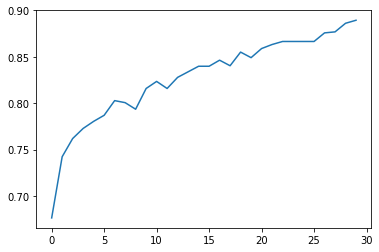

In [56]:
plt.plot(Model_data['accuracy'])

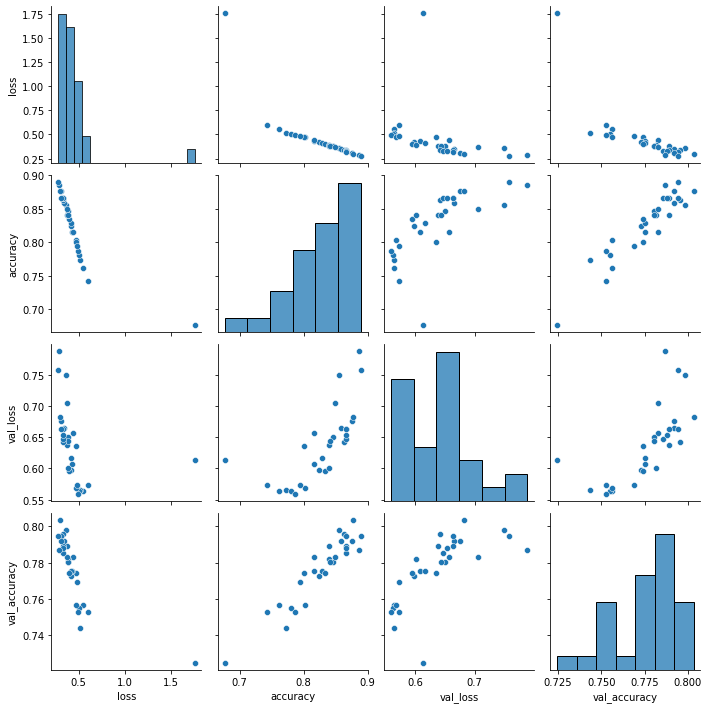

In [62]:
sns.pairplot(Model_data)